# Lab 1 - GSS Happiness - Wrangling
## Group 11
## `! git clone https://www.github.com/DS3001/group11

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Data/selectedData.csv') # Import data into environment
df.head()

,age,year,wrkstat,rincome,happy,satfin,satjob
0,23.0,1972,working full time,NaN,not too happy,not satisfied at all,a little dissatisfied
1,70.0,1972,retired,NaN,not too happy,more or less satisfied,NaN
2,48.0,1972,working part time,NaN,pretty happy,pretty well satisfied,moderately satisfied
3,27.0,1972,working full time,NaN,not too happy,not satisfied at all,very satisfied
4,61.0,1972,keeping house,NaN,pretty happy,pretty well satisfied,NaN


In [3]:
# wrangling
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables
print(df.columns, '\n') # Column names

(72390, 7) 

age        float64
year         int64
wrkstat     object
rincome     object
happy       object
satfin      object
satjob      object
dtype: object 

Index(['age', 'year', 'wrkstat', 'rincome', 'happy', 'satfin', 'satjob'], dtype='object') 



Many of the variables are of the "object" data type; because these data are categorical, this is okay.
We will look at age, year, and income first.

count    71621.000000
mean        46.555982
std         17.600417
min         18.000000
25%         32.000000
50%         44.000000
75%         60.000000
max         89.000000
Name: age, dtype: float64 

[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 89.
 86.] 

30.0    1571
32.0    1566
34.0    1552
28.0    1548
33.0    1526
        ... 
18.0     267
85.0     221
86.0     211
87.0     158
88.0     130
Name: age, Length: 72, dtype: int64 



<AxesSubplot:>

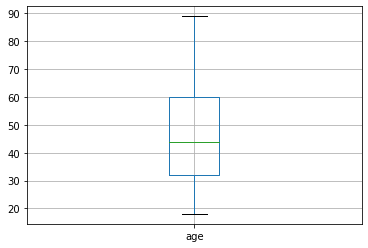

In [32]:
# Age
var = 'age'
print(df[var].describe(),'\n') # 72390-71612=769 missing values
print(df[var].unique(),'\n') # missing values are already in nan format
df[var].hist(bins=50) # Initial histogram, odd spikes may be due to how survey was previously administered


In [5]:
df[var+'_NA'] = df[var].isnull() # makes variable with 1 to indicate missing and 0 to indicate present
print('Total Missings: \n', sum(df[var+'_NA']),'\n') # says 769 are missing, matches expected
# the data us clean already

Total Missings: 
 769 



count    72390.000000
mean      1997.715541
std         15.109995
min       1972.000000
25%       1985.000000
50%       1998.000000
75%       2010.000000
max       2022.000000
Name: year, dtype: float64 



<AxesSubplot:>

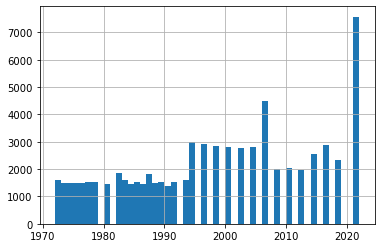

In [35]:
# Year
var = 'year'
print(df[var].describe(),'\n') # 72390-72390=0 missing values
df[var].hist(bins=50) # Initial histogram, looks like some years are missing but no data 

count                 72354
unique                    8
top       working full time
freq                  35267
Name: wrkstat, dtype: object 

['working full time' 'retired' 'working part time' 'keeping house'
 'in school' 'unemployed, laid off, looking for work'
 'with job, not at work rn' 'other' nan] 

working full time                         35267
retired                                   10886
keeping house                             10764
working part time                          7430
unemployed, laid off, looking for work     2621
in school                                  2187
other                                      1643
with job, not at work rn                   1556
Name: wrkstat, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 36 



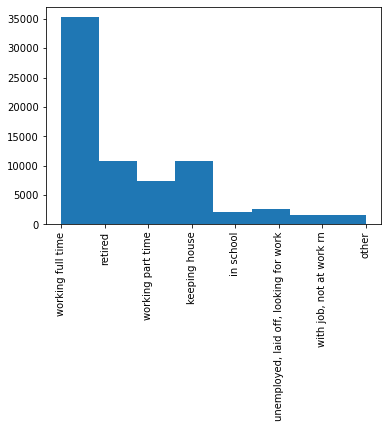

In [24]:
# Work status
var = 'wrkstat'
print(df[var].describe(),'\n') # 72390-72354=36 missing values expected
print(df[var].unique(),'\n') # 8 categories not including nan (keeping "other")
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=8,grid=False), '\n')
plt.xticks(rotation=90)
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') # 36 missing values, already in nan form
df.loc[df[var] == 'with a job, but not at work because of temporary illness, vacation, strike', var] = 'with job, not at work rn' #shortening variable name 

count               42333
unique                 12
top       $25,000 or more
freq                18249
Name: income, dtype: object 

[nan '$1,000 to $2,999' '$15,000 to $19,999' '$7,000 to $7,999'
 '$8,000 to $9,999' '$20,000 to $24,999' '$4,000 to $4,999'
 '$10,000 to $14,999' '$25,000 or more' '$3,000 to $3,999' 'under $1,000'
 '$5,000 to $5,999' '$6,000 to $6,999'] 

Total Missings: 
 30057 



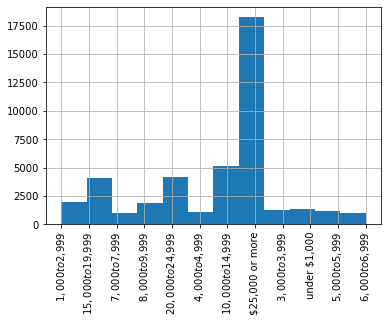

In [14]:
# Income
df = df.rename(columns = {'rincome': 'income'}) # change respondent income, "rincome," to "income"
var = 'income'
print(df[var].describe(),'\n') # 72390-42333=30057 missing values
print(df[var].unique(),'\n') # missing values are already in nan format
df[var].hist(bins=12) # odd spikes may be due to how survey previously pooled ages (Methodological 56)
plt.xticks(rotation=90)
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') 
#could potentially use median of ranges and change the type to an integer 

count            67588
unique               3
top       pretty happy
freq             37813
Name: happy, dtype: object 

['not too happy' 'pretty happy' 'very happy' nan] 

pretty happy     37813
very happy       20385
not too happy     9390
Name: happy, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 4802 



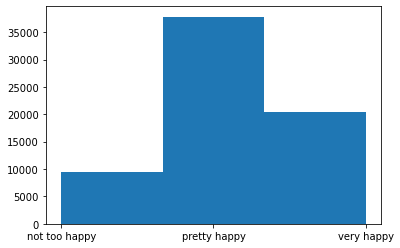

In [27]:
#happy
var = 'happy'
print(df[var].describe(),'\n') # 72390-67588=4,802 missing values expected
print(df[var].unique(),'\n') # 3 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=3,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of missings is same as nan

count                      67722
unique                         3
top       more or less satisfied
freq                       29987
Name: satisfy, dtype: object 

['not satisfied at all' 'more or less satisfied' 'pretty well satisfied'
 nan] 

more or less satisfied    29987
pretty well satisfied     19726
not satisfied at all      18009
Name: satisfy, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 4668 



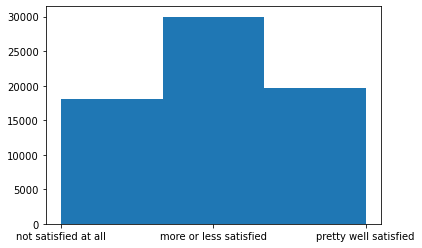

In [26]:
#satfin
df = df.rename(columns = {'satfin': 'satisfy'})
var = 'satisfy'
print(df[var].describe(),'\n') # 72390-67722=4,668 missing values expected
print(df[var].unique(),'\n') # 3 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=3,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of missings is same as nan

count              51887
unique                 4
top       very satisfied
freq               24718
Name: satjob, dtype: object 

['a little dissatisfied' nan 'moderately satisfied' 'very satisfied'
 'very dissatisfied'] 

very satisfied           24718
moderately satisfied     19854
a little dissatisfied     5157
very dissatisfied         2158
Name: satjob, dtype: int64 

AxesSubplot(0.125,0.125;0.775x0.755) 

Total Missings: 
 20503 



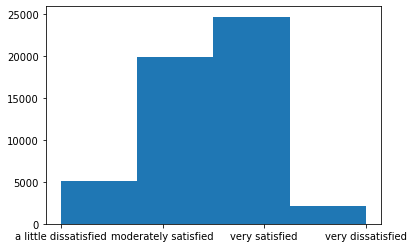

In [28]:
#satjob
var = 'satjob'
print(df[var].describe(),'\n') # 72390-51887=20,503 missing values expected
print(df[var].unique(),'\n') # 4 categories not including nan
print(df[var].value_counts(), '\n')
print(df[var].hist(bins=4,grid=False), '\n')
df[var+'_NA'] = df[var].isnull() # Create a bond missing dummy; long tail
print('Total Missings: \n', sum(df[var+'_NA']),'\n') #number of missings is same as nan